In [1]:
### Set working directory:
setwd("G:\\My Drive\\SDM_China")
#setwd("/export/home/mk843/mnt/")
### Load libraries
library(rstan)
library(rgdal)
library("bayesplot")
library("ggplot2")
library('grid') # For plotting with ggplot and grid
library('rethinking') # use this for the link function and generating predictions
### Define the path in which to save models:
### Define the model to run
mname<-'parabolic_simple_iCAR'
path2model<-paste('outputs/models/',mname,'.rds',sep="")
path2model<-paste('outputs\\models\\',mname,'.rds',sep="")
path2trace <- paste('outputs\\05_01_Traceplot_',mname,'.png',sep="")
path2posterior <- paste('outputs\\05_02_Posterior_distribution_',mname,'.png',sep="")
path2posterior_areas <- paste('outputs\\05_03_Posterior_distribution_area_',mname,'.png',sep="")
path2pairs <- paste('outputs\\05_04_Pairs_plot',mname,'.png',sep="")

### Define the data to import of posterior predictive checks:
china<-readOGR(dsn = "data/china_data", layer = "china_data")

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Loading required package: sp

rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/ycrnm/Documents/R/win-library/3.5/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/ycrnm/Documents/R/win-library/3.5/rgdal/proj
 Linking to sp versi

OGR data source with driver: ESRI Shapefile 
Source: "G:\My Drive\SDM_China\data\china_data", layer: "china_data"
with 2409 features
It has 36 fields


In [2]:
fit<-readRDS(path2model)

In [3]:
posterior <- rstan::extract(fit) # This should be equivalent with extract samples, but need to double chaeck that

In [4]:
#Get parameters from fit
parameters <- names(posterior)

In [5]:
np_cp <- nuts_params(fit)

No divergences to plot.



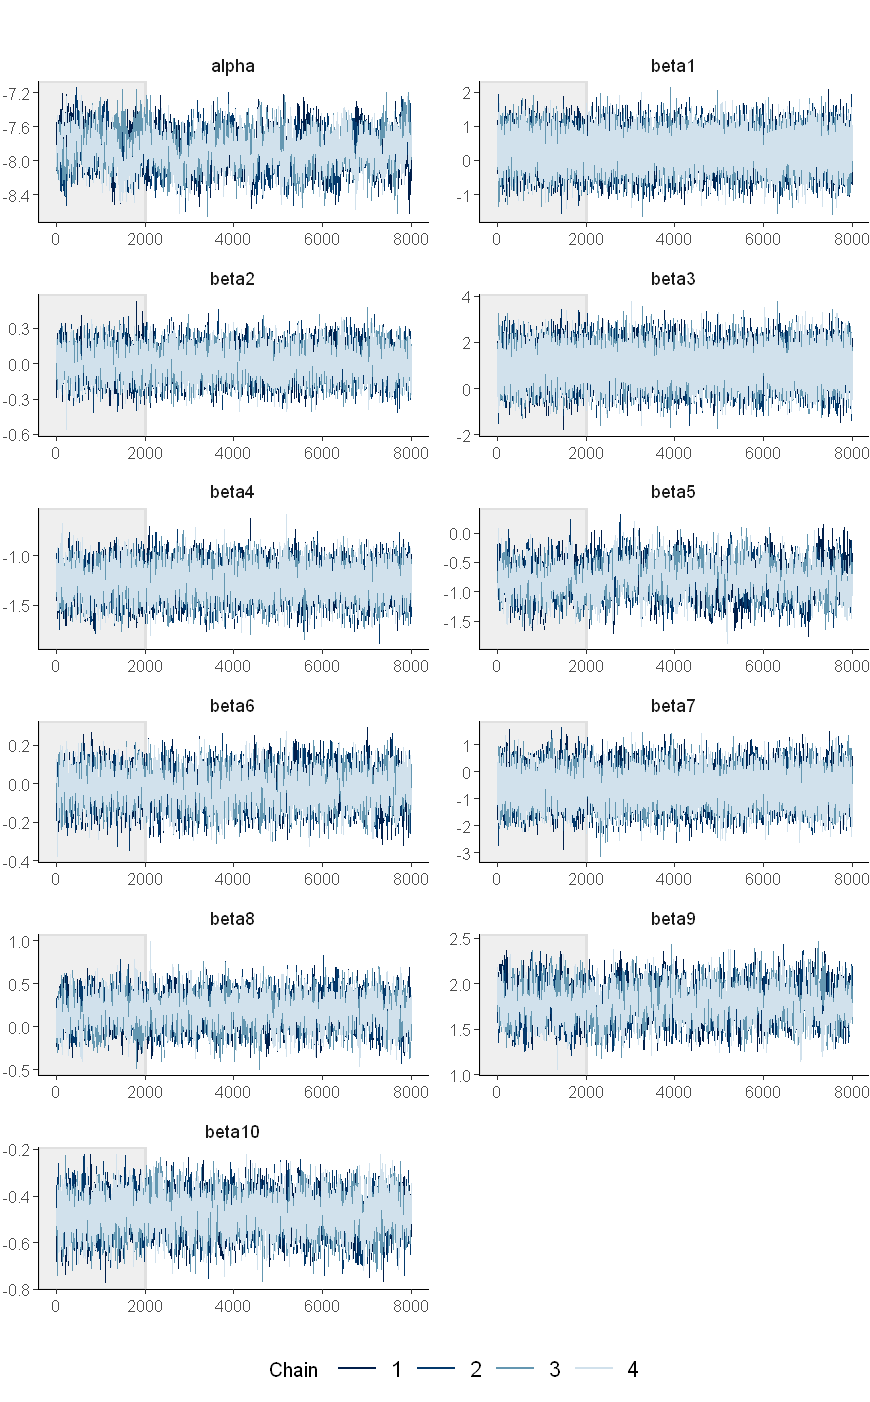

In [6]:
### To do:
# Adjust the position of the x axis title
# Add the relevant title
# Add information about the trainins samples:


#### This plots the mcmc chains

saved <- options(repr.plot.width=7.25, repr.plot.height=11.69)
saved$repr.plot.width <- 7.25
saved$repr.plot.height<-11.69
options(saved)
color_scheme_set("blue")
mcmc_trace(fit,
           n_warmup=fit@stan_args[[1]]$warmup, #number of warmup iterations to include
           regex_pars = c("alpha","beta"), #which parameters to show
           np = np_cp,
           facet_args=list(ncol=2)) + #options for how many plots to show per row
  #labs(title ="Traceplot of the MCMC",x="\nIterations") + # Define the titles of the plots and labs
  theme(plot.margin = unit(c(1,0,0,0), "cm")) + # defines the margins
  legend_move(position = "bottom")+ # moves legend to the bottom
  theme(text = element_text(family = "sans"))+ # defines the font of the text
  facet_text(family = "sans") + #defines the font of the text
  theme(panel.spacing = unit(0.5, "lines"))+ # Spacing between the panels
  theme(legend.key.size=(unit(1,"cm")))+
  guides(color = guide_legend(override.aes = list(size = 0.75)))
 
#family sets the type of the family font to use
ggsave(path2trace,width = saved$repr.plot.width, height = saved$repr.plot.height, units = "in", device='png')

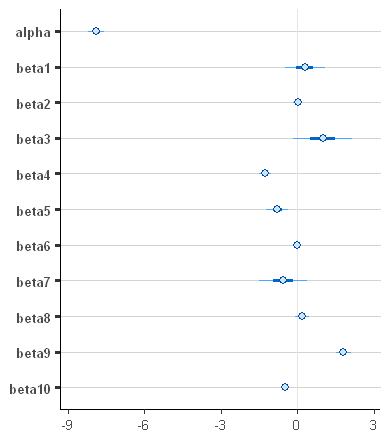

In [194]:
## This does not want to change the size of the symbols
#saved <- options(repr.plot.width=4.25, repr.plot.height=6.69)
saved$repr.plot.width <- 3.25
saved$repr.plot.height<-3.69
options(saved)
color_scheme_set("brightblue")
posterior_plot<-mcmc_intervals(fit,regex_pars = c("alpha","beta")) +
theme(text = element_text(family = "sans"), # defines the font of the text
      axis.text=element_text(size=8),# defines the size of the axis labels
      panel.grid.major.y=element_line(color="lightgray",size=0.1))
### Transform ggplot to grid table, to change the size of the data points
q <- ggplot_build(posterior_plot) #Builds the qtable from posterior plot
q$data[[3]]$size <- rep(1,length(q$data[[3]]$size)) # This define the size of the quartile markers
q$data[[4]]$size <- rep(2,length(q$data[[4]]$size)) # This defines the size of the median points
q <- ggplot_gtable(q)
grid.draw(q)
ggsave(path2posterior,q,width = saved$repr.plot.width, height = saved$repr.plot.height, units = "in", device='png')

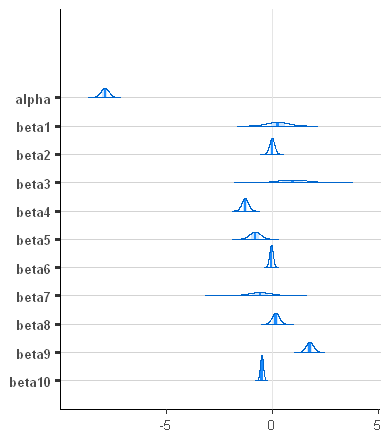

In [218]:
## This does not want to change the size of the symbols
#saved <- options(repr.plot.width=4.25, repr.plot.height=6.69)
saved$repr.plot.width <- 3.25
saved$repr.plot.height<- 3.69
options(saved)
color_scheme_set("brightblue")
mcmc_areas(fit,regex_pars = c("alpha","beta")) +
theme(text = element_text(family = "sans"), # defines the font of the text
      axis.text=element_text(size=8),# defines the size of the axis labels
      panel.grid.major.y=element_line(color="lightgray",size=0.1))

ggsave(path2posterior_areas,width = saved$repr.plot.width, height = saved$repr.plot.height, units = "in", device='png')

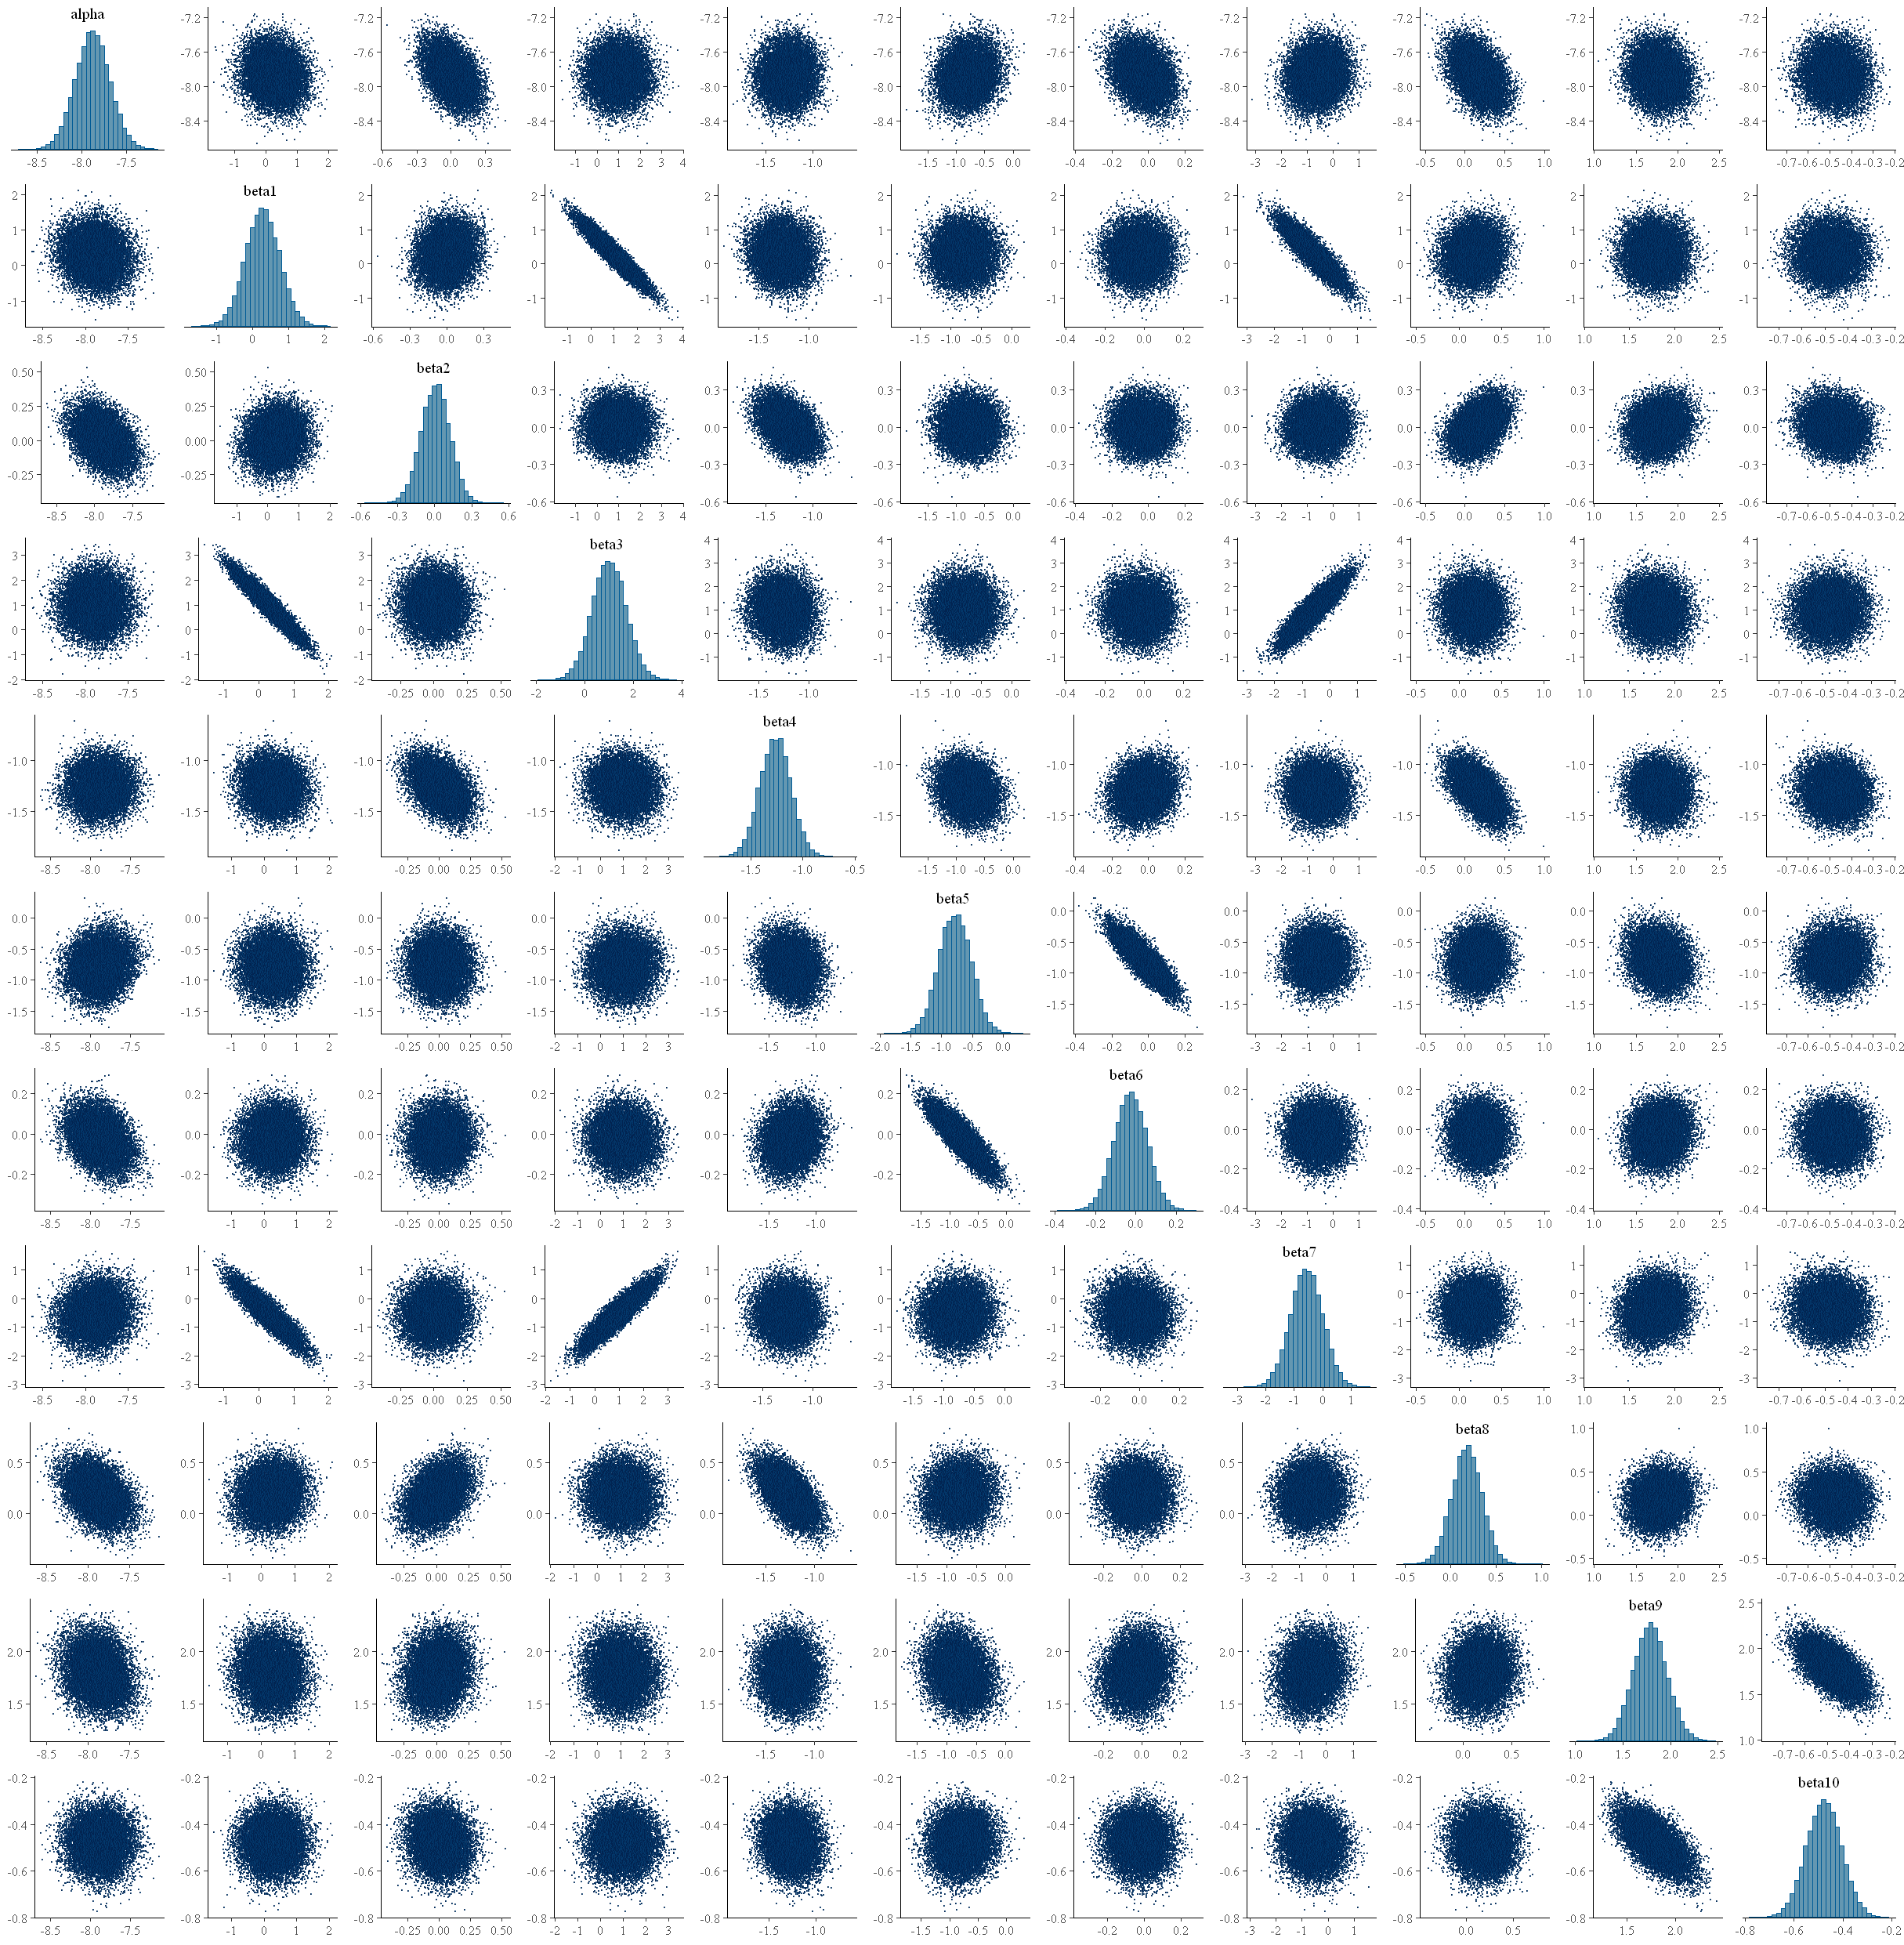

In [242]:
### Bayesplot:
saved$repr.plot.width <- 20.25
saved$repr.plot.height<- 20.69
options(saved)
color_scheme_set("blue")
pairs<-mcmc_pairs(fit, regex_pars = c("alpha","beta"),
           off_diag_args = list(size = 0.01))
pairs
ggsave(path2pairs,pairs,width = saved$repr.plot.width, height = saved$repr.plot.height, units = "in",device='png')

In [5]:
data<-china@data[c('BIO10_sd','BIO17_sd','BIO4_sd','BIO9_sd','npp_sd')]

In [8]:
square<-function(x){
    x=x^2
    return(x)
}

### Utility function to calcualte predictions
pred <- function(fit, data, posterior){
    code<-fit@stanmodel@model_code
    equation <- gsub(",.*","",(gsub(".*alpha","",code)))
    equation <- gsub(c("\n"),"",equation)
    equation <- gsub(c(" "),"",equation)
    if(is.null(posterior)){
    posterior <- rstan::extract(fit)}
    names<-names(posterior)
    names<-names[grep("beta",names)]

    ### Do the code for each county:
    ### County is a list of 1: 20..   
    predictions <-c()
    for (county in 1:nrow(data)){
        print(county)
        print(county)
        ### Start by redefining formula
        formula<-equation
        ### Substitute the values of the variables to the equation
        for(var in 1:length(data)){
            formula<-gsub(paste("x",var,sep=""),data[county,var],formula)
        } 
        ### Now get the formula and value for each combination of parameters:
        county_pred<-c()
        for(i in 1:length(posterior['alpha'][[1]])){
            it_eq<-formula
            for (name in names){
                it_eq<-gsub(name,posterior[name][[1]][i],it_eq)
            }
            it_eq<-gsub('phi',posterior['phi'][[1]][i,county],it_eq)
            it_eq<-paste(posterior['alpha'][[1]][i],it_eq,sep="")
            pred<-eval(parse(text=it_eq))
            county_pred[i]<-pred
        }
        predictions<-cbind(predictions,county_pred)}
    return(predictions)
}

In [ ]:
a<-pred(fit, data, posterior)

In [ ]:
ppc_intervals(y, yrep, x = NULL, ..., prob = 0.5, prob_outer = 0.9,
  size = 1, fatten = 3)

In [ ]:
#An S by N matrix of draws from the posterior predictive distribution, where S is the size of the posterior sample (or subset of the posterior sample used to generate yrep) and N is the number of observations (the length of y). The columns of yrep should be in the same order as the data points in y for the plots to make sense. See Details for additional instructions.

ppc_intervals(china@data$, a, x = NULL, ..., prob = 0.5, prob_outer = 0.9,
  size = 1, fatten = 3)

In [ ]:
# Get mean for each county:
colMeans
mean(a)